# Random Forest

In [1]:
# Preload packages
from pyspark.sql import SparkSession
from pyspark.ml import feature, regression, evaluation, Pipeline
from pyspark.sql import functions as fn, Row
import matplotlib.pyplot as plt
spark = SparkSession.builder.getOrCreate()
sc = spark.sparkContext
# dataframe functions
from pyspark.sql import functions as fn
from imblearn.over_sampling import SMOTE
from sklearn.metrics import f1_score


In [2]:
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.classification import LogisticRegression, RandomForestClassifier
from pyspark.ml import Pipeline
import pandas as pd
from pyspark.ml.evaluation import BinaryClassificationEvaluator
import numpy as np

## Load data and clean dataset

In [3]:
feature_selected_data = pd.read_csv('Step02_updated02.csv',sep = ',')

/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
feature_selected_data.head()

,channelGrouping,fullVisitorId,visitId,visitNumber,deviceCategory,isMobile,country,totalshits,totalspageviews,totalssessionQualityDim,...,transactionRevenue,transactions,Nbrowsers,Noperatingsystem,Ntotalsbounces,NtotalsnewVisits,NadwordsClickInfoisVideoAd,NisTrueDirect,NtrafficSourcemedium,NtrafficSourcesource
0,Referral,8934116514970143966,1508176307,6,desktop,False,United States,2,2,2,...,0,0,Chrome,others,0,0,0,0,referral,google
1,Direct,7992466427990357681,1508201613,1,mobile,True,United States,2,2,1,...,0,0,Chrome,Android,0,1,0,1,others,others
2,Referral,166277907528479249,1508196701,1,desktop,False,United States,2,2,2,...,0,0,Chrome,Macintosh,0,1,0,0,others,others
3,Organic Search,5983987899933814948,1508177658,1,mobile,True,United States,2,2,1,...,0,0,Safari,iOS,0,1,0,0,organic,google
4,Paid Search,6135613929977117121,1508166431,10,mobile,True,United States,2,2,1,...,0,0,Safari,iOS,0,0,0,0,cpc,google


In [5]:
feature_selected_data['NtrafficSourcesource'].unique()

array(['google', 'others', 'youtube'], dtype=object)

### Define numbers to categorical variables

In [6]:
feature_selected_data.channelGrouping[feature_selected_data.channelGrouping == 'Referral'] = 1
feature_selected_data.channelGrouping[feature_selected_data.channelGrouping == 'Direct'] = 2
feature_selected_data.channelGrouping[feature_selected_data.channelGrouping == 'Organic Search'] = 3
feature_selected_data.channelGrouping[feature_selected_data.channelGrouping == 'Paid Search'] = 4
feature_selected_data.channelGrouping[feature_selected_data.channelGrouping == 'Display'] = 5
feature_selected_data.channelGrouping[feature_selected_data.channelGrouping == 'Social'] = 6
feature_selected_data.channelGrouping[feature_selected_data.channelGrouping == 'Affiliates'] = 7
feature_selected_data.channelGrouping[feature_selected_data.channelGrouping == '(Other)'] = 8

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda3/lib/python3.6/site-p

In [7]:
feature_selected_data.deviceCategory[feature_selected_data.deviceCategory == 'desktop'] = 1
feature_selected_data.deviceCategory[feature_selected_data.deviceCategory == 'mobile'] =2
feature_selected_data.deviceCategory[feature_selected_data.deviceCategory == 'tablet'] = 3

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [8]:
feature_selected_data.Nbrowsers[feature_selected_data.Nbrowsers == 'Chrome'] = 1
feature_selected_data.Nbrowsers[feature_selected_data.Nbrowsers == 'Safari'] = 2
feature_selected_data.Nbrowsers[feature_selected_data.Nbrowsers == 'others'] = 3

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [9]:
feature_selected_data.Noperatingsystem[feature_selected_data.Noperatingsystem == 'others'] = 1
feature_selected_data.Noperatingsystem[feature_selected_data.Noperatingsystem == 'Android'] = 2
feature_selected_data.Noperatingsystem[feature_selected_data.Noperatingsystem == 'Macintosh'] = 3
feature_selected_data.Noperatingsystem[feature_selected_data.Noperatingsystem == 'iOS'] = 4
feature_selected_data.Noperatingsystem[feature_selected_data.Noperatingsystem == 'Windows'] = 5

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda3/lib/python3.6/site-p

In [10]:
feature_selected_data.NtrafficSourcemedium[feature_selected_data.NtrafficSourcemedium == 'referral'] = 1
feature_selected_data.NtrafficSourcemedium[feature_selected_data.NtrafficSourcemedium == 'others'] = 2
feature_selected_data.NtrafficSourcemedium[feature_selected_data.NtrafficSourcemedium == 'organic'] = 3
feature_selected_data.NtrafficSourcemedium[feature_selected_data.NtrafficSourcemedium == 'cpc'] = 4
feature_selected_data.NtrafficSourcemedium[feature_selected_data.NtrafficSourcemedium == 'cpm'] = 5
feature_selected_data.NtrafficSourcemedium[feature_selected_data.NtrafficSourcemedium == 'affiliate'] = 6

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda3/lib/python3.6/site-p

In [11]:
feature_selected_data.NtrafficSourcesource[feature_selected_data.NtrafficSourcesource == 'google'] = 1
feature_selected_data.NtrafficSourcesource[feature_selected_data.NtrafficSourcesource == 'others'] = 2
feature_selected_data.NtrafficSourcesource[feature_selected_data.NtrafficSourcesource == 'youtube'] = 3

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [12]:
feature_selected_data=feature_selected_data.drop(columns=['fullVisitorId', 'visitId','country','transactionRevenue','transactions'])



In [13]:
feature_selected_data = feature_selected_data[['totalTransactionRevenue','channelGrouping', 'visitNumber', 'deviceCategory', 'isMobile',\
                                              'totalshits', 'totalspageviews', 'totalssessionQualityDim',\
                                              'totalstimeOnSite', 'Nbrowsers',\
                                              'Noperatingsystem', 'Ntotalsbounces', 'NtotalsnewVisits',\
                                              'NadwordsClickInfoisVideoAd', 'NisTrueDirect', 'NtrafficSourcemedium',\
                                              'NtrafficSourcesource']]

In [14]:
feature_selected_data.loc[feature_selected_data["totalTransactionRevenue"]==0,"totalTransactionRevenue"] = 0
feature_selected_data.loc[feature_selected_data["totalTransactionRevenue"]!=0,"totalTransactionRevenue"] = 1

In [15]:
feature_selected_data.rename(columns={'totalTransactionRevenue':'label'}, inplace=True) # change the name of y label to 'label'


In [16]:
feature_selected_data_2 = spark.createDataFrame(feature_selected_data)

## Split the train validation and test data

In [17]:
training_df, validation_df, testing_df = feature_selected_data_2.randomSplit([0.6, 0.3, 0.1], seed=0)

## Oversample the training data

In [18]:
training_df = training_df.toPandas()

In [19]:
x_train = training_df.iloc[:,1:]

In [20]:
y_train = training_df.iloc[:,0]

In [21]:
sm = SMOTE(random_state=0, ratio = 1.0)
x_train_res, y_train_res = sm.fit_sample(x_train, y_train)

In [22]:
colnames=feature_selected_data.columns[1:]

In [23]:
colnames

Index(['channelGrouping', 'visitNumber', 'deviceCategory', 'isMobile',
       'totalshits', 'totalspageviews', 'totalssessionQualityDim',
       'totalstimeOnSite', 'Nbrowsers', 'Noperatingsystem', 'Ntotalsbounces',
       'NtotalsnewVisits', 'NadwordsClickInfoisVideoAd', 'NisTrueDirect',
       'NtrafficSourcemedium', 'NtrafficSourcesource'],
      dtype='object')

In [24]:
pd.Index(['label'],
      dtype='object')

Index(['label'], dtype='object')

In [25]:
dataset = pd.DataFrame(x_train_res,columns=colnames)

In [26]:
lableset=pd.DataFrame(y_train_res,columns=pd.Index(['label'],
      dtype='object'))

In [27]:
frames=[lableset,dataset]

In [28]:
training_df=pd.concat(frames,axis=1)

In [29]:
len(training_df.columns)

17

In [30]:
training_df

,label,channelGrouping,visitNumber,deviceCategory,isMobile,totalshits,totalspageviews,totalssessionQualityDim,totalstimeOnSite,Nbrowsers,Noperatingsystem,Ntotalsbounces,NtotalsnewVisits,NadwordsClickInfoisVideoAd,NisTrueDirect,NtrafficSourcemedium,NtrafficSourcesource
0,0,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
1,0,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
2,0,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
3,0,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
4,0,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
5,0,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
6,0,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
7,0,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
8,0,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
9,0,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000


In [31]:
training_df = training_df.round(0)

In [32]:
training_df = training_df.astype(int)

In [33]:
training_df = spark.createDataFrame(training_df)

In [34]:
training_df

DataFrame[label: bigint, channelGrouping: bigint, visitNumber: bigint, deviceCategory: bigint, isMobile: bigint, totalshits: bigint, totalspageviews: bigint, totalssessionQualityDim: bigint, totalstimeOnSite: bigint, Nbrowsers: bigint, Noperatingsystem: bigint, Ntotalsbounces: bigint, NtotalsnewVisits: bigint, NadwordsClickInfoisVideoAd: bigint, NisTrueDirect: bigint, NtrafficSourcemedium: bigint, NtrafficSourcesource: bigint]

## Build the rf model

In [35]:
va = VectorAssembler().setInputCols(training_df.columns[1:]).setOutputCol('features')

In [36]:
rf_1 = RandomForestClassifier() 

In [37]:
rf_pipeline1 = Pipeline(stages=[va, rf_1]).fit(training_df) # first train the rf model with default parameters

## Validation

In [38]:
# create the auc function which returns the auc with given rf_pipeline(Actually we dont use this to evaluate the performance)
bce = BinaryClassificationEvaluator()
def AUC_cv(pipeline):
    return bce.evaluate(pipeline.transform(validation_df))

In [39]:
# # create the F1 score function which returns the auc with given rf_pipeline
y_true = validation_df.select('label').toPandas()['label'].tolist()
def F1_score_cv(pipeline):
    y_pred = pipeline.transform(validation_df).select('prediction').toPandas().round(0)['prediction'].tolist()
    F1 = f1_score(y_true, y_pred)
    return F1

In [40]:
original = validation_df.select('label').toPandas()
def F1_score_cv(pipeline):
    prediction = pipeline.transform(validation_df).select('prediction').toPandas()
    prediction = prediction.astype(int)
    combine = pd.concat([prediction,original], axis = 1)
    df_confusion = pd.crosstab(original['label'],prediction['prediction'])
    if df_confusion.shape[1] ==2:
        precision = df_confusion[1][1]/(df_confusion[1][1]+df_confusion[1][0])
        recall = df_confusion[1][1]/(df_confusion[1][1] + df_confusion[0][1])
        F1 = 2 * (precision * recall) / (precision + recall)
    else: F1 = 9.9
    return F1

In [41]:
F1_score_cv(rf_pipeline1)

0.31327151016397475

In [42]:
original = validation_df.select('label').toPandas()
def CM(pipeline):
    prediction = pipeline.transform(validation_df).select('prediction').toPandas()
    prediction = prediction.round(0)
    combine = pd.concat([prediction,original], axis = 1)
    df_confusion = pd.crosstab(original['label'],prediction['prediction'])
    precision = df_confusion[1][1]/(df_confusion[1][1]+df_confusion[1][0])
    recall = df_confusion[1][1]/(df_confusion[1][1] + df_confusion[0][1])
    F1 = 2 * (precision * recall) / (precision + recall)
    return df_confusion

In [43]:
cm = CM(rf_pipeline1)

In [44]:
cm

prediction,0.0,1.0
label,,
0,187331,22207
1,157,5101


#### Validation: prune the maxdepth value

In [44]:
n_maxdepth = range(1,15)
validation_results_maxdepth = []
for estimator in n_maxdepth:
    rf = RandomForestClassifier(maxDepth=estimator)
    rf_pipeline = Pipeline(stages=[va, rf]).fit(training_df)
    F1_score = F1_score_cv(rf_pipeline)
    validation_results_maxdepth.append(F1_score)



In [45]:
validation_results_maxdepth

[0.2878637893486438,
 0.28953584336492216,
 0.2944650301065308,
 0.30243179122182684,
 0.31327151016397475,
 0.32739413785354265,
 0.3356666446542957,
 0.34452098958156585,
 0.3515454261629722,
 0.3567598080722551,
 0.36260338007910825,
 0.3679829868367983,
 0.3736774968109852,
 0.3789441398612123]

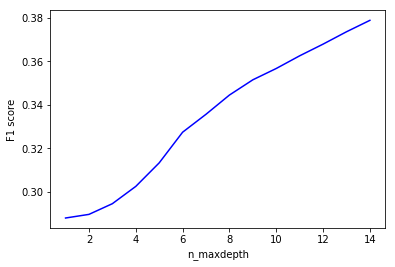

In [46]:
from matplotlib.legend_handler import HandlerLine2D
f = plt.figure()
plt.plot(n_maxdepth, validation_results_maxdepth, 'b', label='Validation AUC')


plt.ylabel('F1 score')
plt.xlabel('n_maxdepth')
plt.show()
f.savefig('2.pdf')

#### Validation: prune the number of trees value

In [59]:
n_estimators = np.linspace(11,201,11, endpoint = True)
validation_results_Ntrees = []
for estimator in n_estimators:
    rf = RandomForestClassifier(numTrees=estimator)
    rf_pipeline = Pipeline(stages=[va, rf]).fit(training_sample)
    F1_score = F1_score_cv(rf_pipeline)
    validation_results_Ntrees.append(F1_score)


In [2]:
import numpy as np

In [11]:
np.linspace(20,150,14, endpoint = True)

array([ 20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100., 110., 120.,
       130., 140., 150.])

In [60]:
validation_results_Ntrees

[0.3116867211659165,
 0.31747811730990877,
 0.31882515030060116,
 0.3192629500799098,
 0.31646631255241825,
 0.31862439146174015,
 0.3161226262877001,
 0.31550586850825313,
 0.3165512314811939,
 0.3153660498793242,
 0.3152066320217768]

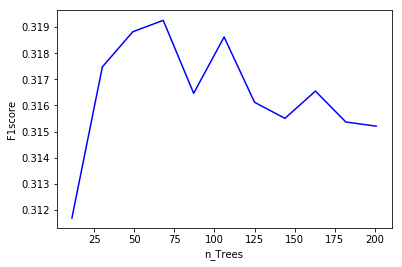

In [61]:
f = plt.figure()
plt.plot(n_estimators, validation_results_Ntrees, 'b', label='Validation AUC')


plt.ylabel('F1score')
plt.xlabel('n_Trees')
plt.show()

f.savefig('3.pdf')

###### maxdepth = 15, num of trees = 60 have the best performance on validation data

In [46]:
training_sample, training_sample2= training_df.randomSplit([0.1,0.9], seed=0)
validation_sample,validation_sample2 = validation_df.randomSplit([0.3,0.7], seed=0)




In [47]:
rf_best = RandomForestClassifier(maxDepth = 15, numTrees=60)
rf_pipeline_best_val = Pipeline(stages=[va, rf_best]).fit(training_sample)
F1_score_cv(rf_pipeline_best_val)


0.3730120121243873

In [48]:
F1_score_cv(rf_pipeline_best_val)

0.3730120121243873

In [49]:
CM(rf_pipeline_best_val)

prediction,0.0,1.0
label,,
0,193057,16481
1,274,4984


## Apply the pruned model to testing data

In [50]:
rf_test = RandomForestClassifier(maxDepth = 15, numTrees=60)
rf_pipeline_test = Pipeline(stages=[va, rf_test]).fit(training_sample)


In [ ]:
AUC_test = bce.evaluate(rf_pipeline_test.transform(testing_df))

In [ ]:
AUC_test

In [51]:
original_test = testing_df.select('label').toPandas()

In [52]:
prediction_test = rf_pipeline_test.transform(testing_df).select('prediction').toPandas()
prediction_test = prediction_test.astype('int')
combine_test = pd.concat([prediction_test,original_test], axis = 1)
df_confusion_test = pd.crosstab(original_test['label'],prediction_test['prediction'])
precision_test = df_confusion_test[1][1]/(df_confusion_test[1][1]+df_confusion_test[1][0])
recall_test = df_confusion_test[1][1]/(df_confusion_test[1][1] + df_confusion_test[0][1])
F1_test = 2 * (precision_test * recall_test) / (precision_test + recall_test)


In [53]:
df_confusion_test

prediction,0,1
label,,
0,64692,5392
1,94,1693


In [ ]:
F1_test1

In [54]:
F1_test

0.3816501352569883

In [ ]:
baseline = 1-((testing_df.select('label').toPandas().sum())/len(testing_df.select('label').toPandas()))
baseline


In [ ]:
rf_model = rf_pipeline_test1.stages[-1]

## feature importances

In [ ]:
pd.DataFrame(list(zip(training_df.columns[1:], rf_model.featureImportances.toArray())),
            columns = ['column', 'weight']).sort_values('weight',ascending = False).head()

In [13]:

from scipy import *
from scipy.linalg import norm, pinv
from matplotlib import pyplot as plt
 
class RBF:
    def __init__(self, indim, numCenters, outdim):
        self.indim = indim
        self.outdim = outdim
        self.numCenters = numCenters
        self.centers = [random.uniform(-1, 1, indim) for i in range(numCenters)]
        self.beta = 8
        self.W = random.random((self.numCenters, self.outdim))
 
    def _basisfunc(self, c, d):
        assert len(d) == self.indim
        return exp(-self.beta * norm(c-d)**2)
 
    def _calcAct(self, X):
        # 计算RBFs的激活函数值
        G = zeros((X.shape[0], self.numCenters), float)
        for ci, c in enumerate(self.centers):
            for xi, x in enumerate(X):
                G[xi,ci] = self._basisfunc(c, x)
        return G
 
    def train(self, X, Y):
        """ X: n x indim维的矩阵
            y: n x 1维的列向量"""
 
        # 从训练集随机选择中心向量
        rnd_idx = random.permutation(X.shape[0])[:self.numCenters]
        self.centers = [X[i,:] for i in rnd_idx]
 
        print("center", self.centers)
        # 计算RBFs的激活函数值
        G = self._calcAct(X)
        print(G)
 
        # 计算输出层的权值
        self.W = dot(pinv(G), Y)
 
    def test(self, X):
        """ X: n x indim维的矩阵 """
 
        G = self._calcAct(X)
        Y = dot(G, self.W)
        return Y


In [25]:
from sklearn import datasets,model_selection

In [26]:
iris = datasets.load_iris()
training_features, test_features, training_target, \
test_target = model_selection.train_test_split(iris.data, iris.target, test_size=.4, random_state=0)


In [23]:
clf = RBF(4,3,3)

In [24]:
clf.test(test_features)

array([[5.89874047e-265, 1.00331580e-264, 9.45479940e-265],
       [1.84626488e-210, 3.14030891e-210, 2.95928668e-210],
       [1.82617239e-181, 3.10613363e-181, 2.92708143e-181],
       [0.00000000e+000, 0.00000000e+000, 0.00000000e+000],
       [1.77762677e-142, 3.02356245e-142, 2.84927004e-142],
       [0.00000000e+000, 0.00000000e+000, 0.00000000e+000],
       [2.20894318e-142, 3.75718783e-142, 3.54060579e-142],
       [4.10279342e-285, 6.97843460e-285, 6.57616470e-285],
       [7.93807460e-286, 1.35018580e-285, 1.27235472e-285],
       [1.07744919e-227, 1.83263156e-227, 1.72699002e-227],
       [1.22713687e-282, 2.08723508e-282, 1.96691700e-282],
       [3.35466766e-267, 5.70594871e-267, 5.37703090e-267],
       [1.73600600e-250, 2.95276976e-250, 2.78255818e-250],
       [6.65050796e-266, 1.13118381e-265, 1.06597703e-265],
       [6.63916698e-254, 1.12925482e-253, 1.06415924e-253],
       [2.79935111e-143, 4.76141170e-143, 4.48694146e-143],
       [1.59191714e-243, 2.70768925e-243